# Alexa review post sentiment analysis 

![]("alexa.jpg")

About the Data

This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review and variant of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc. for learning how to train Machine for sentiment analysis.

![](alexa.jfif)

In [45]:
#importing required libraries
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.downloader.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SIDDHARTH\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [46]:
df=pd.read_csv("abc.csv")   #converting datdset to dataframe

In [47]:
df

,rating,date,variation,verified_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...
4,5,31-Jul-18,Charcoal Fabric,Music
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ..."
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...
8,5,30-Jul-18,Heather Gray Fabric,looks great
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...


In [48]:
df.info() #checking is any null value is present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 4 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
dtypes: int64(1), object(3)
memory usage: 98.5+ KB


In [49]:
df.shape

(3150, 4)

In [50]:
a=df["variation"].unique()
a

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [51]:
b=df.groupby("variation",sort=False).size()
b

variation
Charcoal Fabric                 430
Walnut Finish                     9
Heather Gray Fabric             157
Sandstone Fabric                 90
Oak Finish                       14
Black                           261
White                            91
Black  Spot                     241
White  Spot                     109
Black  Show                     265
White  Show                      85
Black  Plus                     270
White  Plus                      78
Configuration: Fire TV Stick    350
Black  Dot                      516
White  Dot                      184
dtype: int64

Text(0, 0.5, 'units sold')

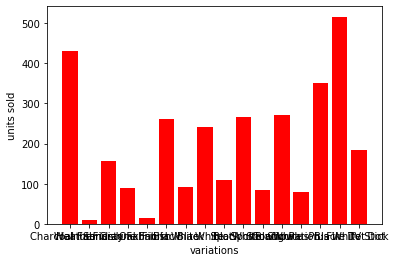

In [53]:
plt.bar(a,b,color="r")
plt.xlabel("variations")
plt.ylabel("units sold")

In [57]:
y=df.iloc[:,3]
y

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
5       I received the echo as a gift. I needed anothe...
6       Without having a cellphone, I cannot use many ...
7       I think this is the 5th one I've purchased. I'...
8                                             looks great
9       Love it! I’ve listened to songs I haven’t hear...
10      I sent it to my 85 year old Dad, and he talks ...
11      I love it! Learning knew things with it eveyda...
12      I purchased this for my mother who is having k...
13                                     Love, Love, Love!!
14                               Just what I expected....
15                              I love it, wife hates it.
16      Really happy with this purchase.  Great speake...
17      We hav

Vader Sentiment Analysis works better for with texts from social media and in general as well.
It is based on lexicons of sentiment-related words.
Each words in the lexicon is rated whether it is positive or negative.

When it comes to analysing comments or text from social media, the sentiment of the sentence changes 
based on the emoticons. Vader takes this into account along with slang, capitalization etc and 
hence a better option when it comes to tweets analysis and their sentiments.

Refer to this paper for more details.

It produces 4 metrics - positive, negative, neutral and compound score.
I did Twitter sentiment analysis using Vader and was surprised that the sentiments 
were better compared to textBlob. You can refer to the code in my githubrepo
I manually validated random tweets and came up with a compound score that can determine positive and negative tweets.

In [71]:
sid=SentimentIntensityAnalyzer()

In [72]:
sid.polarity_scores("<3")

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}

In [70]:
sid.polarity_scores("The product did step up to the expectations very well")

{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.3384}

In [59]:
sid.polarity_scores("Not bad for a 200 dollar investment")

{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.431}

In [60]:
sid.polarity_scores("Not bad for a 200 dollar investment !")

{'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'compound': 0.484}

In [76]:
sid.polarity_scores("Certainly not bad for a 200 dollar investment !")

{'neg': 0.0, 'neu': 0.474, 'pos': 0.526, 'compound': 0.6749}

In [77]:
sid.polarity_scores("i was quite impressed by the way alexa responds")

{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.5256}

In [62]:
for data in y:
    ss=sid.polarity_scores(data)
    print(data)
    for k in ss:
        print(k,ss[k])

Love my Echo!
neg 0.0
neu 0.308
pos 0.692
compound 0.6696
Loved it!
neg 0.0
neu 0.193
pos 0.807
compound 0.636
Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.
neg 0.102
neu 0.784
pos 0.114
compound -0.128
I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.
neg 0.0
neu 0.617
pos 0.383
compound 0.9169
Music
neg 0.0
neu 1.0
pos 0.0
compound 0.0
I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.
neg 0.0
neu 0.698
pos 0.302
compound 0.8697
Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her 

pos 0.172
compound 0.3612
A great investment. Alexa has helped me out and made me laugh.
neg 0.0
neu 0.539
pos 0.461
compound 0.8271
Yet another Exho for our home and love them all!!!
neg 0.0
neu 0.639
pos 0.361
compound 0.7249
I love it, I can plan any gender of music from big band to jazz, not easy to find on local radio. Sound is good and I can stop it with a voice command if I get a phone call.
neg 0.11
neu 0.719
pos 0.17
compound 0.5414
Good Value
neg 0.0
neu 0.0
pos 1.0
compound 0.6486
Super easy set up and am loving our new Echo!
neg 0.0
neu 0.389
pos 0.611
compound 0.8999
Whats not to like about this speaker.  Just ask Alexa
neg 0.19
neu 0.81
pos 0.0
compound -0.2755
BEST father's day gift. Dad joked to my mom that Alexa will be the one listening to all of his (repeated) stories going forward.
neg 0.0
neu 0.675
pos 0.325
compound 0.8788
Great addition to our breakfast room kitchen.  Tunes and information instantly available.  Slowly learning more features.
neg 0.0
neu 0.785
pos

if you don't have an Echo you definitely need one
neg 0.0
neu 0.769
pos 0.231
compound 0.4019
Great device.  Seems to work better than the 1st generation!
neg 0.0
neu 0.523
pos 0.477
compound 0.807
Item no longer works after just 5 months of use. Will not connect to wifi and unresponsive to reset requests.
neg 0.109
neu 0.891
pos 0.0
compound -0.296
I love the Echo Dot. So easy. So fun. I get to drop in on my Grandaughter who lives about 2000 miles away. Sounds like she is right next to me.
neg 0.053
neu 0.602
pos 0.345
compound 0.9127
Works great no different than the new ones
neg 0.179
neu 0.488
pos 0.333
compound 0.4404
This one's going in the kitchen for timer/music duty.
neg 0.0
neu 1.0
pos 0.0
compound 0.0
Love it but the volume could definitely use a boost. If it had better built in speaker's, would definitively be a 5 star. They thought ahead and put  an audio auxiliary input, so I bought a dedicated speaker for the Echo. Proved to be best way to go.
neg 0.0
neu 0.609
pos 0.391

pos 0.782
compound 0.8011
Loved the price for an essentially brand new Dot!! Opening it, you really couldn’t tell that it was refurbished. Everything looked brand new. For $20 less than a new unit, I couldn’t consider this a better deal! I really love the versatility of the echo dot. Get you one while you can!
neg 0.0
neu 0.777
pos 0.223
compound 0.9317
Pleased with the order just what I wanted!!
neg 0.0
neu 0.633
pos 0.367
compound 0.5399
I think I now have 5 of these throughout the house. So convenient to set a timer or check the weather or whatever, wherever.
neg 0.0
neu 1.0
pos 0.0
compound 0.0
Love it -- the best.  My experience with refurbished devices is excellent.
neg 0.0
neu 0.427
pos 0.573
compound 0.9201
Love the echo dot
neg 0.0
neu 0.417
pos 0.583
compound 0.6369
This refurbished item was fine,but I wasn't aware that there is a fee for having other echos set up in the rooms.  However, it was missing the cordThank you
neg 0.078
neu 0.922
pos 0.0
compound -0.296
Two weeks af

neg 0.17
neu 0.83
pos 0.0
compound -0.7882
Love it!  Works perfectly!
neg 0.0
neu 0.182
pos 0.818
compound 0.8745
I had a brand new echo Dot and thought that the refurbished would be just as good. It was quite different from my expectations. Refurbished unit did not even turn on and after a while I realized that the power adapter was faulty. There is no way for me to have Amazon send me a power adapter by itself according to the return options. I love Amazon and buy even my toilet paper through them but this was truly a let down.Update: Amazon contacted me and credited me enough to buy a new power adapter. This is why I shop on Amazon. I can always trust them to deliver on their products.
neg 0.028
neu 0.777
pos 0.195
compound 0.9562
I bought this for a family member as a gift. I called her to see how she likes it & she said she loves it??
neg 0.0
neu 0.635
pos 0.365
compound 0.8677
Not very loud but quality and ease of use is great. Sound is perfect for background music, would suggest

compound 0.0
We were pleasantly surprised at the sound quality and the many features. How nice to easily hear a particular artist or hear our books just by a simple command. Looking forward to exploring other options with this device.
neg 0.0
neu 0.758
pos 0.242
compound 0.8481
Met and exceeded my expectations. Easy set up and is really quick in responses.
neg 0.0
neu 0.818
pos 0.182
compound 0.4404
I like the fact that I can get any kind of music from Prime that I want on request from Alexa. I liked the informative photo little pamphlet but wish it included how to connect your TV etc. to the commands from Alexa. BUT, I really love having the music.
neg 0.0
neu 0.738
pos 0.262
compound 0.9216
i have not found a way to access my echo thorough my prime account.  I think it should be part of the top line with video, music, etc.  I also think the setup app where i define, for example music i like, is not well integrated into echo.  I have tried to ask for my playlist and echo is not sure e

neu 0.696
pos 0.304
compound 0.8979
The sound quality is good just wish alexa could answer more questions
neg 0.0
neu 0.641
pos 0.359
compound 0.6808
This is my second Echo, I have the Dot but the speaker is weak so I purchased this and for listening to music the speaker is great.
neg 0.118
neu 0.708
pos 0.174
compound 0.4215
great sound
neg 0.0
neu 0.196
pos 0.804
compound 0.6249
Great
neg 0.0
neu 0.0
pos 1.0
compound 0.6249
We really only use this as a speaker to stream music. We’ve had it 7 months and it’s just kinda useless.
neg 0.122
neu 0.878
pos 0.0
compound -0.3626
Once set up very user friendly. Set-up wasn't as user friendly as I'd hoped.. The alexa app should be able to download to a pc without installing [invasive ] drivers. My wife and I are both retired and she wouldn't have been able to install Alexa, but if my son wasn't supplying her with a smart phone we wouldn't be using Alexa yet.
neg 0.0
neu 0.875
pos 0.125
compound 0.7922
Very easy set up. Really enjoying it
neg 0

neg 0.029
neu 0.728
pos 0.242
compound 0.9
Fun to work with still learning everything she can do
neg 0.0
neu 0.732
pos 0.268
compound 0.5106
Awesome. I love that it shows the lyrics of songs!
neg 0.0
neu 0.449
pos 0.551
compound 0.8622
Love the alarm feature...just tell what time.
neg 0.207
neu 0.431
pos 0.362
compound 0.4215
I think the dot listens better than spot.
neg 0.0
neu 0.674
pos 0.326
compound 0.4404
Had a dot and upgraded to this! I like it. My only complaint is the very short instructions
neg 0.114
neu 0.723
pos 0.164
compound 0.2422
Big step up from the Dot! Dropped one star due to consistent delay in bringing up Ring Pro video, though looks great once the feed is displayed.
neg 0.073
neu 0.789
pos 0.139
compound 0.4753
Easy set up and to use. I bought two one for my house and one for my 75 year old grandfather. I set it up for him a gave him a 15 minute lesson and he calls me at least once a day it’s is great to be able to see him in between visits.
neg 0.0
neu 0.873
pos 

pos 0.0
compound -0.5526
Have not used it yet. But I'm sure it's as great as the others.. I can not get over how amazing the echo , echo dots are. This has to be some of the greatest technology that has ever came out.
neg 0.0
neu 0.709
pos 0.291
compound 0.9371
I am very excited and happy with this. It was a breeze to set up and my favorite feature is reading my Kindle and going to sleep to Thunderstorm music.
neg 0.0
neu 0.721
pos 0.279
compound 0.8643
Still learning to use these things.  They sure are smart!  haha  She started reading a book to me yesterday.  Get one.  I like the way it controls the brightness all by itself when lights are turned off at night.
neg 0.0
neu 0.705
pos 0.295
compound 0.908
I highly recommend the spot! I have it connected to the kasa camera and it is so convenient to just ask spot to, &#34;show me the camera&#34; when someone is at the door. Love it! As soon as amazon has a good sale on these again I will be getting another one! Good job Amazon!
neg 0.0
n

compound 0.91
The Echo Show is ok, however the constant suggestions about what to ask Alexa are sooooo annoying and there is no way to eliminate it. Also, I thought I could have the weather for an area displayed continuously,  but I have to talk to Alexa, which I don't want to do in the middle of the night. Had I payed full price it would have been returned. There are other features that are nice, but I may never use them.
neg 0.06
neu 0.873
pos 0.067
compound 0.3647
We held off purchasing an Echo but couldn't resist during Prime Days.  The Echo works great and it's nice to have the screen.  There is still a lot more we need to learn how to do.
neg 0.0
neu 0.779
pos 0.221
compound 0.8847
 
neg 0.0
neu 0.0
pos 0.0
compound 0.0
Love it very much, still learning everything that my Echo can do, but am really enjoying the whole process.
neg 0.0
neu 0.69
pos 0.31
compound 0.8243
Love it!! Still learning all the possibilities.
neg 0.0
neu 0.556
pos 0.444
compound 0.6988
I love the echo show a

neu 0.757
pos 0.148
compound 0.671
The best part about owning this is that my mother who is anti-technology uses this with ease everyday and finds new reasons to use it as well. Well done.
neg 0.0
neu 0.696
pos 0.304
compound 0.872
It’s my second one, so I put this one in the kitchen for recipes.
neg 0.0
neu 1.0
pos 0.0
compound 0.0
Echo Show is perfect for staging in the kitchen so recipes are right there. No need to print them. Wonderful device. Acoustical sounds are not as powerful as our tall cylindercal echo but we have that covered in the adjacent family room.
neg 0.071
neu 0.827
pos 0.102
compound 0.3472
Great fun but frustrating at times. Commands between tv and the show get mixed (asking to watch something will turn my directv, not display on show which stinks with an 8 year old) Also would like more video options with flash briefings. Still really a tech wonder for a low price.
neg 0.153
neu 0.712
pos 0.135
compound -0.2617
Love that you can play music and see the lyrics.  Co

Very satisfied with the purchase. The package came in good time and was just as expected
neg 0.0
neu 0.7
pos 0.3
compound 0.7178
great sound easy set up looks cool
neg 0.0
neu 0.301
pos 0.699
compound 0.8519
Love the Echo Plus!! Much better versatility than the first generation Echo. Intercom and voice-controllable smart bulbs are awesome!
neg 0.0
neu 0.504
pos 0.496
compound 0.9411
My new BFF!
neg 0.0
neu 0.289
pos 0.711
compound 0.7118
Alexa didn’t know answers to many questions we asked. For example we asked how many cups in a pound and she said a pound is a form of money
neg 0.0
neu 1.0
pos 0.0
compound 0.0
For now, I love everything. So cool with my music and flash briefings, 5 star Echo
neg 0.0
neu 0.639
pos 0.361
compound 0.7778
Great product. I have two and may want to buy a third!
neg 0.0
neu 0.584
pos 0.416
compound 0.69
So far we have enjoyed it.  The only problem we have is I have not been able to call one of my sons with it (the sad part is he is the one who gave it to me:

pos 0.535
compound 0.8845
I can't get multiple profiles working. It just spins when adding a 2nd user at pass device prompt
neg 0.0
neu 1.0
pos 0.0
compound 0.0
I love it , using music and turning on and off light
neg 0.0
neu 0.682
pos 0.318
compound 0.6369
It has great sound and very responsive to commands!
neg 0.0
neu 0.493
pos 0.507
compound 0.8012
This thing is great. Has good sound and does everything I expected. I have it linked in with my lights and use it with alarm.com as well.
neg 0.0
neu 0.707
pos 0.293
compound 0.8442
No problems whatsoever makes life easy and sounds great.
neg 0.29
neu 0.296
pos 0.414
compound 0.4767
This is a very useful device.  I use it to turn my lights on and off around the house.  It works with all the other Alexa devices, so I can give a command near any of them, and this will process the request.  It also handles all the functions that the other devices can do. I enjoy it much more than I thought I would.
neg 0.0
neu 0.898
pos 0.102
compound 0.7501

pos 0.0
compound 0.0
 
neg 0.0
neu 0.0
pos 0.0
compound 0.0
Didn’t really work as smooth as they make it seem like.
neg 0.0
neu 0.8
pos 0.2
compound 0.3612
it does everything that it offers.
neg 0.0
neu 1.0
pos 0.0
compound 0.0
LOVE!
neg 0.0
neu 0.0
pos 1.0
compound 0.6696
Besides being fun, it also has many practical aspects--a real bonus for those with vision issues!
neg 0.0
neu 0.588
pos 0.412
compound 0.8439
Works perfect
neg 0.0
neu 0.213
pos 0.787
compound 0.5719
Alexa us funny and enjoyable. Nice sound
neg 0.0
neu 0.317
pos 0.683
compound 0.8225
Echo Plus with built-in Hub - Black ...Amazon
neg 0.0
neu 1.0
pos 0.0
compound 0.0
Good product I like it . Thank you !
neg 0.0
neu 0.268
pos 0.732
compound 0.8016
It's louder than the dot and it's got a built in hub for all the other wireless controls in the house.
neg 0.0
neu 1.0
pos 0.0
compound 0.0
Easy set up
neg 0.0
neu 0.408
pos 0.592
compound 0.4404
Was debating between a 4 and a 5 star review. The one challenge with the hub is t

neu 0.612
pos 0.388
compound 0.923
My 90 year old Mom LOVES that she can watch the 1st Season of Blue Bloods ?. My one wish is that she could watch CSI:MIAMI...without having to pay for it...?? The bill for OPTIMUM is already, quite high. Can you help us? We live on Long Island, NY (Suffolk County )
neg 0.024
neu 0.794
pos 0.182
compound 0.8858
Excellent
neg 0.0
neu 0.0
pos 1.0
compound 0.5719
I ABSOLUTELY LOVE IT!!!  It’s just what l needed and MORE!!!  I didn’t realize that the remote included voice remote.  HOW CONVENIENT!!!!  I’m so glad that l made that purchase!!!!
neg 0.0
neu 0.686
pos 0.314
compound 0.9185
It’s better than I thought, it practically turns your regular tv into a smart tv!
neg 0.0
neu 0.651
pos 0.349
compound 0.7088
Lovee it! It has evrything I need it, now I cant even get my dad out of my room hahahaha... movie addicts.
neg 0.0
neu 1.0
pos 0.0
compound 0.0
Works great to watch youtube and amazin video
neg 0.0
neu 0.631
pos 0.369
compound 0.6249
Like it alots, som

neu 0.327
pos 0.673
compound 0.8834
Fantastic product, I use it as a smart home hub and to play music through speakers mainly, the customizable routines are so nice and very easy to program
neg 0.0
neu 0.575
pos 0.425
compound 0.9383
Great
neg 0.0
neu 0.0
pos 1.0
compound 0.6249
I am quite disappointed by this product.There clearly is a bug: half of the time I ask for a newsflash, two second after it starts, the whole thing stops and reboots for a couple of minutes. Same goes when I ask to play the radio. Also, many times it get confused when I ask to switch of &#34;the lights&#34;...as other items are also named the same, which is not true. Clearly no AI or natural language, very 'beta' stage still for me. Not impressed!
neg 0.161
neu 0.735
pos 0.104
compound -0.6418
Love this thing works great and kids love it to
neg 0.0
neu 0.359
pos 0.641
compound 0.926
Love it.. makes the simple things in life simpler
neg 0.0
neu 0.656
pos 0.344
compound 0.6369
I am really enjoying the many differ

I'm finding more and more uses for this all the time. It keeps me informed with news and weather, I can get a daily Bible verse, and have it play music. New skills are added all the time. The future is here!
neg 0.0
neu 0.935
pos 0.065
compound 0.4003
I love to watch my wife argue with Alexa.  I woke up one night listening to Alexa talking to my cell phone. ????
neg 0.09
neu 0.715
pos 0.194
compound 0.5803
 
neg 0.0
neu 0.0
pos 0.0
compound 0.0
 
neg 0.0
neu 0.0
pos 0.0
compound 0.0
Gave as a gift - they loved it.
neg 0.0
neu 0.37
pos 0.63
compound 0.7783
The Echo Dot was everything that I expected and more.
neg 0.0
neu 1.0
pos 0.0
compound 0.0
I love this its super convenient and makes my life a little easier
neg 0.0
neu 0.43
pos 0.57
compound 0.8911
I love my echo dot. Has many features and works great.The only thing I don't like about it, is that I can't play my iMusic on it. I'm going to have to pay for a Spotify or Amazon music account.
neg 0.131
neu 0.73
pos 0.139
compound 0.33
I

neg 0.0
neu 1.0
pos 0.0
compound 0.0
I do love these things, i have them running my entire home, TV, all my lights, my thermostat, my front door dead bolt, the cameras... and i love listening to npr. these things are well worth the value and they really shine once you stat adding smart devices and you can control your entire home like its right out of star trek.... I named mine computer to get the feel... but its amazing what you can do with these devices and smart systems.
neg 0.028
neu 0.735
pos 0.237
compound 0.9485
Only complaint I have is that the sound quality isn't great. I mostly use it for commands though, and I have another dot hooked up to my stereo system to play music through. I have a couple friends that have a dot and don't mind the audio quality, but if you're bothered by that kind of thing I'd go with the full size echo or make sure you hook the do up to some larger speakers.
neg 0.087
neu 0.827
pos 0.087
compound 0.0008
Good
neg 0.0
neu 0.0
pos 1.0
compound 0.4404
Nic

pos 0.808
compound 0.6369
I'm amazed with the alarm. I tell Alexa to wake me up to a particular song and it does.  I love the play list if music. Not sure if i don't keep prime if music will still be available. However i did love the fact Amazon gave me music free for 3 months...they should have given prime free for 3 months as well.
neg 0.058
neu 0.615
pos 0.326
compound 0.964
I love all of the things that it can do. I can play with it and learn from it.
neg 0.0
neu 0.694
pos 0.306
compound 0.765
Been debating on getting one, but am happy I did! Still more to explore. Thanks!
neg 0.0
neu 0.548
pos 0.452
compound 0.8974
I'm finding more and more uses for this all the time. It keeps me informed with news and weather, I can get a daily Bible verse, and have it play music. New skills are added all the time. The future is here!
neg 0.0
neu 0.935
pos 0.065
compound 0.4003
I love to watch my wife argue with Alexa.  I woke up one night listening to Alexa talking to my cell phone. ????
neg 0.0

pos 0.13
compound -0.1429
Outstanding product - easy to use.  works great
neg 0.0
neu 0.267
pos 0.733
compound 0.9001
We have six of these throughout our home and they are great.  There are times when music or talking happens randomly that may be from sensitive listening.  There should be more options to change the name of the engagement command &#34;Alexa&#34; or &#34;Computer&#34; are a little annoying.  More colors then black and white would also be a good thing.
neg 0.037
neu 0.81
pos 0.153
compound 0.8221
Use the product for music and it’s great!
neg 0.0
neu 0.614
pos 0.386
compound 0.6588
Easy to set-up and to use.
neg 0.0
neu 0.633
pos 0.367
compound 0.4404
It works great!!
neg 0.0
neu 0.299
pos 0.701
compound 0.6892
I like having more Alexa devices in my house and the sales price on amazon prime day was too tempting.
neg 0.0
neu 0.802
pos 0.198
compound 0.4939
PHENOMENAL
neg 0.0
neu 1.0
pos 0.0
compound 0.0
I loved it does exactly what it says
neg 0.0
neu 0.606
pos 0.394
compou

neg: Negative   
neu: Neutral   
pos: Positive   
compound: Compound (i.e. aggregated score)

In [73]:
sid.polarity_scores("The food is good and the atmosphere is nice")

{'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'compound': 0.6908}

When VADER analyses a piece of text it checks to see if any of the words in the text are present in the lexicon. For example, the sentence “The food is good and the atmosphere is nice” has two words in the lexicon (good and nice) with ratings of 1.9 and 1.8 respectively.

VADER produces four sentiment metrics from these word ratings. The first three, positive, neutral and negative, represent the proportion of the text that falls into those categories. As you can see, our example sentence was rated as 45% positive, 55% neutral and 0% negative. The final metric, the compound score, is the sum of all of the lexicon ratings (1.9 and 1.8 in this case) which have been standardised to range between -1 and 1. In this case, our example sentence has a rating of 0.69, which is pretty strongly positive.

In [63]:
def get_ploarity(text):
    return sid.polarity_scores(text)['compound']

In [64]:
df["CSCORES"]=df['verified_reviews'].apply(get_ploarity)
df

,rating,date,variation,verified_reviews,CSCORES
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,0.6696
1,5,31-Jul-18,Charcoal Fabric,Loved it!,0.6360
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",-0.1280
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,0.9169
4,5,31-Jul-18,Charcoal Fabric,Music,0.0000
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,0.8697
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",0.7096
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,0.5563
8,5,30-Jul-18,Heather Gray Fabric,looks great,0.6249
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,0.8877


In [65]:
df.groupby("variation").mean()

,rating,CSCORES
variation,,
Black,4.233716,0.415908
Black Dot,4.453488,0.491103
Black Plus,4.370370,0.583247
Black Show,4.490566,0.554474
Black Spot,4.311203,0.524918
Charcoal Fabric,4.730233,0.602461
Configuration: Fire TV Stick,4.591429,0.500188
Heather Gray Fabric,4.694268,0.624753
Oak Finish,4.857143,0.594186
